#Packages

In [0]:
install.packages("readxl")
install.packages("BAS")
library("readxl")
library(BAS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#Hurdle 1

##Bayesian Regression Model 1


1.   The training and test data is the hurdle 1 test and 
      train data 

1.   The training data is daily data with 12000 rows and
     the test data is 39 rows 4 week data
5.   The data was tranformed using log tranformation to 
     scale  down the large variables




In [0]:
data<-read_excel("Training-Data-Sets.xlsx")
data<-data[,-1]
data<-log(data)

In [0]:
model<- bas.lm(EQ ~ .,
                     data = data,
                     method = "MCMC",
                     prior = "ZS-null",
                     modelprior = uniform())




In [0]:
model


Call:
bas.lm(formula = EQ ~ ., data = data, prior = "ZS-null", modelprior = uniform(), 
    method = "MCMC")


 Marginal Posterior Inclusion Probabilities: 
                         Intercept           Social_Search_Impressions  
                                 1                                   1  
        Social_Search_Working_cost                 Digital_Impressions  
                                 0                                   0  
              Digital_Working_cost             Print_Impressions.Ads40  
                                 0                                   0  
          Print_Working_Cost.Ads50                     OOH_Impressions  
                                 0                                   0  
                  OOH_Working_Cost                             SOS_pct  
                                 0                                   0  
           Digital_Impressions_pct                               CCFOT  
                                 0     

In [0]:
summary(model)







,P(B != 0 | Y),model 1,model 2,model 3,model 4,model 5
Intercept,1.0000000,1.0,1.000,1.0000,1.0000,1.0000
Social_Search_Impressions,0.9999832,1.0,0.000,0.0000,0.0000,1.0000
Social_Search_Working_cost,0.0000000,0.0,0.000,0.0000,0.0000,0.0000
Digital_Impressions,0.0000000,0.0,0.000,0.0000,0.0000,0.0000
Digital_Working_cost,0.0000000,0.0,0.000,0.0000,0.0000,0.0000
Print_Impressions.Ads40,0.0000000,0.0,0.000,0.0000,0.0000,0.0000
Print_Working_Cost.Ads50,0.0000000,0.0,0.000,0.0000,0.0000,0.0000
OOH_Impressions,0.0000000,0.0,0.000,0.0000,0.0000,0.0000
OOH_Working_Cost,0.0000000,0.0,0.000,0.0000,0.0000,0.0000
SOS_pct,0.0000000,0.0,0.000,0.0000,0.0000,0.0000


In [0]:
test=read_excel("Test dataset v1.xlsx")

In [0]:
test<-test[,-1]
test<-log(test)

In [0]:
pred<-predict(model,estimator="BPM",test)

In [0]:

mape_model_bas_bpm = sum(abs((exp(test$EQ) - exp(pred$fit)) / exp(test$EQ))) / 39
print(paste("The test mape is :",toString(mape_model_bas_bpm)))

[1] "The test mape is : 0.994776338259178"


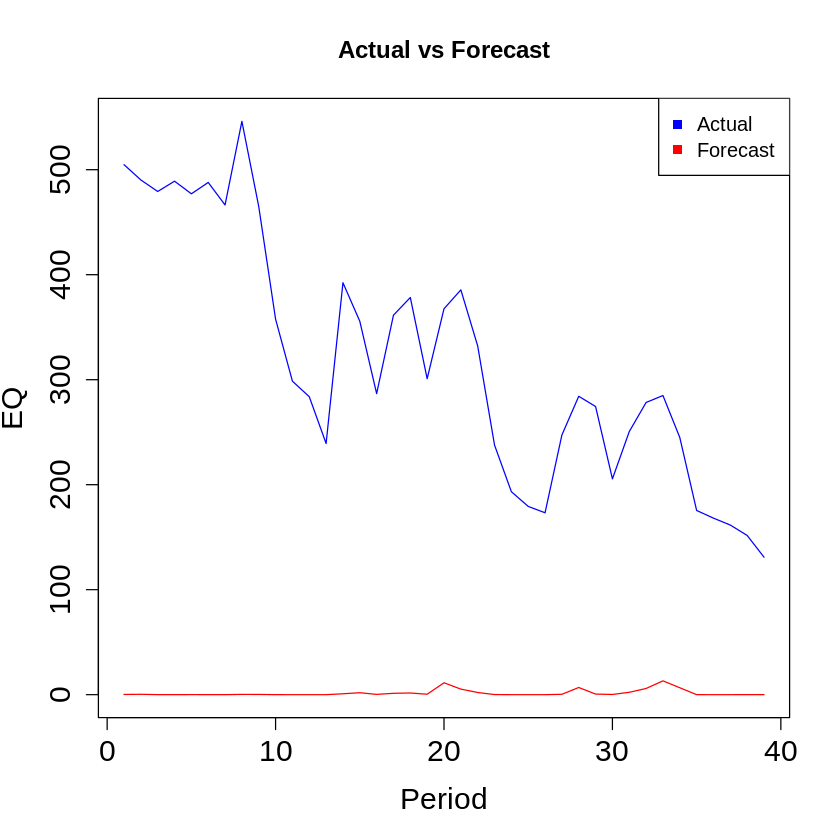

In [0]:
plot(exp(pred$fit), type="l", col="red" ,ylim=range(0,exp(test$EQ)),ylab="EQ",cex.lab=1.5,cex.axis=1.5,main="Actual vs Forecast",xlab="Period")
lines((exp(test$EQ)), type="l",col="blue")
legend("topright",legend=c("Actual","Forecast"),pch=c(15,15),col=c('blue','red'))

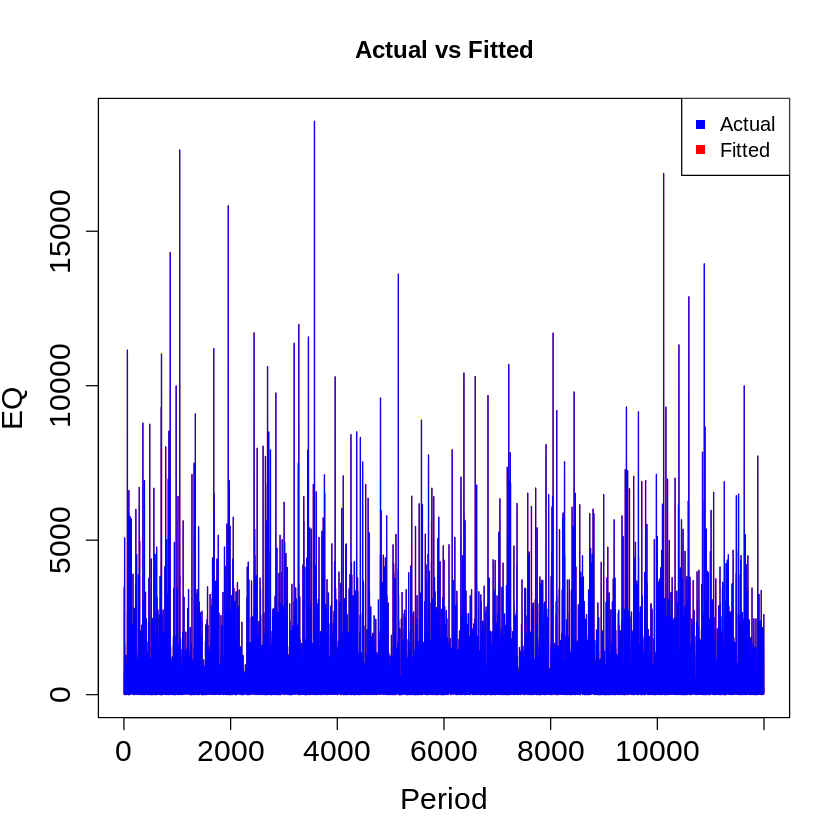

In [0]:
plot(exp(fitted(model,estimator = "BPM")), type="l", col="red" ,ylim=range(0,exp(data$EQ)),ylab="EQ",cex.lab=1.5,cex.axis=1.5,main="Actual vs Fitted",xlab="Period")
lines((exp(data$EQ)), type="l",col="blue")
legend("topright",legend=c("Actual","Fitted"),pch=c(15,15),col=c('blue','red'))

In [0]:
mape_model_bas_bpm = sum(abs((exp(data$EQ) - exp(fitted(model,estimator = "BPM"))) / exp(data$EQ))) / 12000
print(paste("The train mape is :",toString(mape_model_bas_bpm)))

[1] "The train mape is : 4.22802710649792e-08"


##Bayesian Regression Model 2


1.   The training and test data is the hurdle 1 test data 

1.   The training data is daily data with 33 rows and
     the test data is 6 rows 4 week data
5.   The data was tranformed using log tranformation to 
     scale  down the large variables


In [0]:
data<-read_excel("Test dataset v1.xlsx")
full_data<-data[,-1]
data<-log(full_data[1:33,])

In [0]:
model<- bas.lm(EQ ~ .,
                     data = data,
                     method = "MCMC",
                     prior = "ZS-null",
                     modelprior = uniform())



Warning message in bas.lm(EQ ~ ., data = data, method = "MCMC", prior = "ZS-null", :
“Uniform prior (Bernoulli)  distribution on the Model Space are not recommended for p > n; please consider using tr.beta.binomial or power.prior instead”


In [0]:
model


Call:
bas.lm(formula = EQ ~ ., data = data, prior = "ZS-null", modelprior = uniform(), 
    method = "MCMC")


 Marginal Posterior Inclusion Probabilities: 
                         Intercept           Social_Search_Impressions  
                           1.00000                             0.13345  
        Social_Search_Working_cost                 Digital_Impressions  
                           0.16436                             0.11052  
              Digital_Working_cost             Print_Impressions.Ads40  
                           0.08241                             0.61675  
          Print_Working_Cost.Ads50                     OOH_Impressions  
                           0.71473                             0.12372  
                  OOH_Working_Cost                             SOS_pct  
                           0.09751                             0.49770  
           Digital_Impressions_pct                               CCFOT  
                           0.16311     

In [0]:
summary(model)







,P(B != 0 | Y),model 1,model 2,model 3,model 4,model 5
Intercept,1.00000000,1.00000,1.0000000,1.0000000,1.0000000,1.000000
Social_Search_Impressions,0.13344851,0.00000,0.0000000,0.0000000,0.0000000,0.000000
Social_Search_Working_cost,0.16435947,0.00000,0.0000000,0.0000000,0.0000000,0.000000
Digital_Impressions,0.11052227,0.00000,0.0000000,0.0000000,0.0000000,0.000000
Digital_Working_cost,0.08241385,0.00000,0.0000000,0.0000000,0.0000000,0.000000
Print_Impressions.Ads40,0.61674849,1.00000,0.0000000,1.0000000,1.0000000,1.000000
Print_Working_Cost.Ads50,0.71473139,1.00000,1.0000000,1.0000000,1.0000000,0.000000
OOH_Impressions,0.12371710,0.00000,0.0000000,0.0000000,0.0000000,0.000000
OOH_Working_Cost,0.09751438,0.00000,0.0000000,0.0000000,0.0000000,0.000000
SOS_pct,0.49770031,0.00000,1.0000000,1.0000000,1.0000000,1.000000


In [0]:
test=full_data[34:39,]
test<-log(test)

In [0]:
pred<-predict(model,estimator="BPM",test)

In [0]:

mape_model_bas_bpm = sum(abs((exp(test$EQ) - exp(pred$fit)) / exp(test$EQ))) / 6
print(paste("The test mape is :",toString(mape_model_bas_bpm)))

[1] "The test mape is : 0.127014176294593"


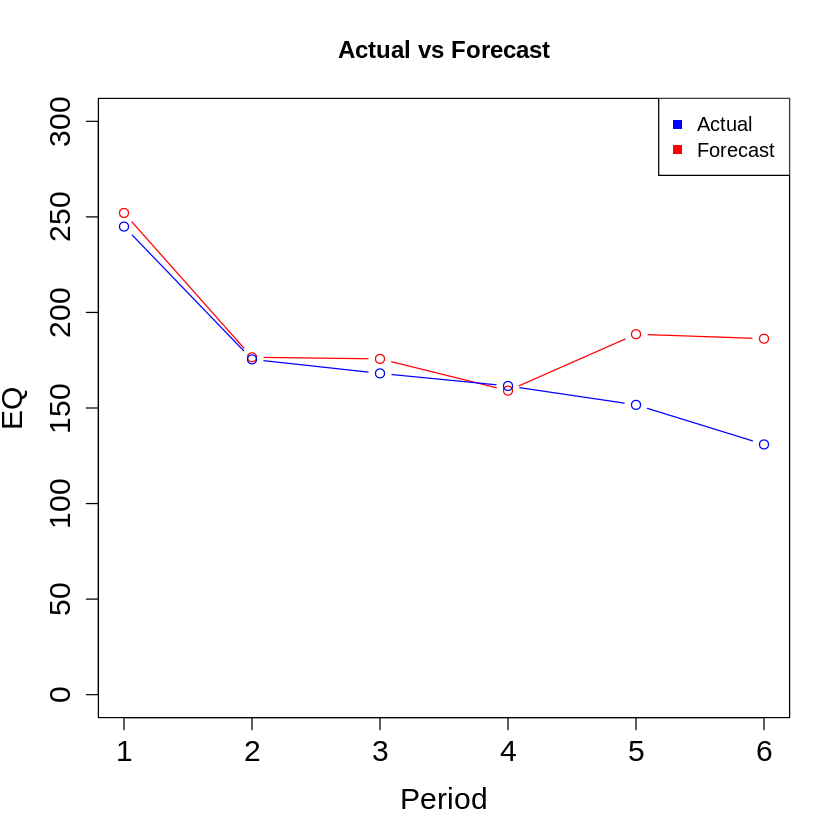

In [0]:
plot(exp(pred$fit), type="b", col="red" ,ylim=range(0,300),ylab="EQ",cex.lab=1.5,cex.axis=1.5,main="Actual vs Forecast",xlab="Period")
lines((exp(test$EQ)), type="b",col="blue")
legend("topright",legend=c("Actual","Forecast"),pch=c(15,15),col=c('blue','red'))

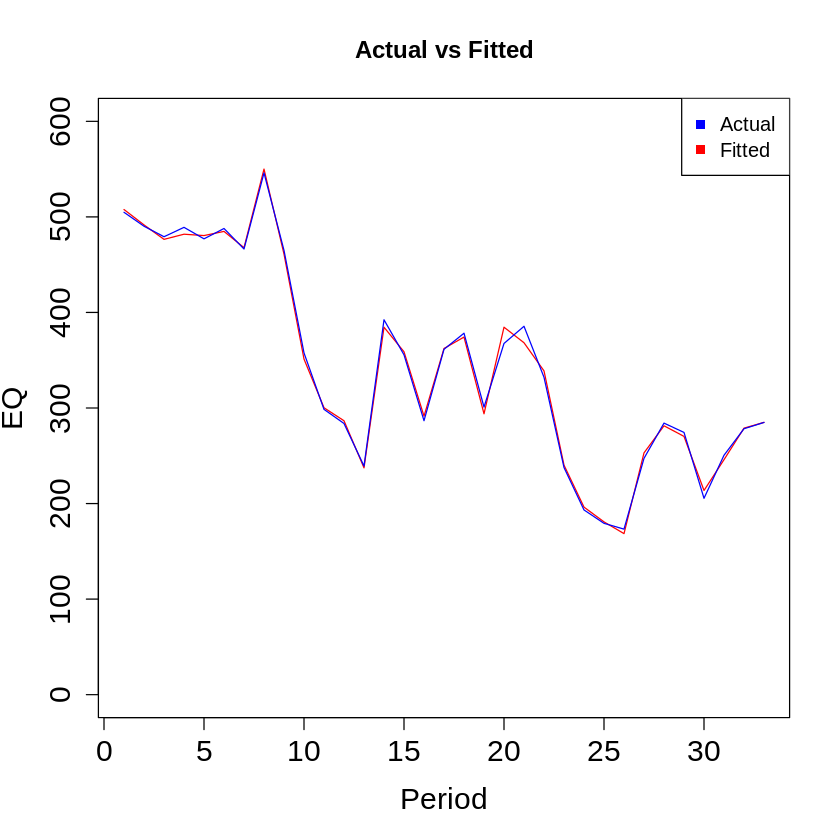

In [0]:
plot(exp(fitted(model,estimator = "BPM")), type="l", col="red" ,ylim=range(0,600),ylab="EQ",cex.lab=1.5,cex.axis=1.5,main="Actual vs Fitted",xlab="Period")
lines((exp(data$EQ)), type="l",col="blue")
legend("topright",legend=c("Actual","Fitted"),pch=c(15,15),col=c('blue','red'))

In [0]:
mape_model_bas_bpm = sum(abs((exp(data$EQ) - exp(fitted(model,estimator = "BPM"))) / exp(data$EQ))) / 33
print(paste("The train mape is :",toString(mape_model_bas_bpm)))

[1] "The train mape is : 0.0141187640900588"


#Hurdle 2

##Bayesian Regression Model 3


1.   The training and test data is the hurdle 2 data with 
     missing values
2.   The missing values were filled using KNN

1.   The training and test data were merged before using
     KNN to fill the missing data as the assumpotion was
     that both train and test data came from the same
     distribution .

3.   The data was tranformed using log tranformation to 
     scale  down the large variables













In [0]:
data<-read_excel("train.xlsx")
data<-data[,-1]
data<-log(data)

New names:
* `` -> ...1



In [0]:
model<- bas.lm(EQ ~ .,
                     data = data,
                     method = "MCMC",
                     prior = "ZS-null",
                     modelprior = uniform())



Warning message in bas.lm(EQ ~ ., data = data, method = "MCMC", prior = "ZS-null", :
“Uniform prior (Bernoulli)  distribution on the Model Space are not recommended for p > n; please consider using tr.beta.binomial or power.prior instead”


In [0]:
model


Call:
bas.lm(formula = EQ ~ ., data = data, prior = "ZS-null", modelprior = uniform(), 
    method = "MCMC")


 Marginal Posterior Inclusion Probabilities: 
                         Intercept           Social_Search_Impressions  
                           1.00000                             0.12694  
        Social_Search_Working_cost                 Digital_Impressions  
                           0.13591                             0.07747  
              Digital_Working_cost             Print_Impressions.Ads40  
                           0.11248                             0.40137  
          Print_Working_Cost.Ads50                     OOH_Impressions  
                           0.50862                             0.72139  
                  OOH_Working_Cost                             SOS_pct  
                           0.19700                             0.20389  
           Digital_Impressions_pct                               CCFOT  
                           0.08913     

In [0]:
summary(model)







,P(B != 0 | Y),model 1,model 2,model 3,model 4,model 5
Intercept,1.00000000,1.00000,1.0000000,1.000000,1.0000000,1.000000
Social_Search_Impressions,0.12694032,0.00000,0.0000000,0.000000,0.0000000,0.000000
Social_Search_Working_cost,0.13591001,0.00000,0.0000000,0.000000,0.0000000,0.000000
Digital_Impressions,0.07746764,0.00000,0.0000000,0.000000,0.0000000,0.000000
Digital_Working_cost,0.11247677,0.00000,0.0000000,0.000000,0.0000000,0.000000
Print_Impressions.Ads40,0.40137414,0.00000,1.0000000,0.000000,0.0000000,1.000000
Print_Working_Cost.Ads50,0.50861923,1.00000,0.0000000,1.000000,1.0000000,0.000000
OOH_Impressions,0.72139457,1.00000,1.0000000,1.000000,1.0000000,1.000000
OOH_Working_Cost,0.19699770,0.00000,0.0000000,0.000000,0.0000000,0.000000
SOS_pct,0.20388960,0.00000,0.0000000,0.000000,0.0000000,0.000000


In [0]:
test=read_excel("test.xlsx")
test<-log(test)

New names:
* `` -> ...1



In [0]:
pred<-predict(model,estimator="BPM",test)

#prediction is done using the best possible model


In [0]:

mape_model_bas_bpm = sum(abs((exp(test$EQ) - exp(pred$fit)) / exp(test$EQ))) / 5
print(paste("The test mape is :",toString(mape_model_bas_bpm)))



[1] "The test mape is : 0.10339530313167"


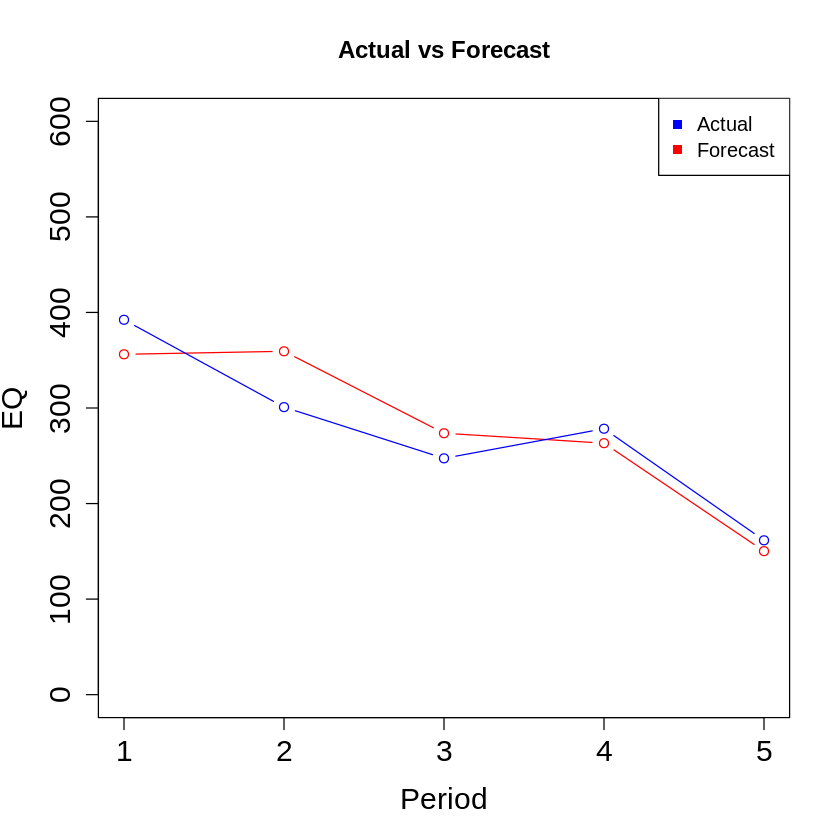

In [0]:
plot(exp(pred$fit), type="b", col="red" ,ylim=range(0,600),ylab="EQ",cex.lab=1.5,cex.axis=1.5,main="Actual vs Forecast",xlab="Period")
lines((exp(test$EQ)), type="b",col="blue")
legend("topright",legend=c("Actual","Forecast"),pch=c(15,15),col=c('blue','red'))

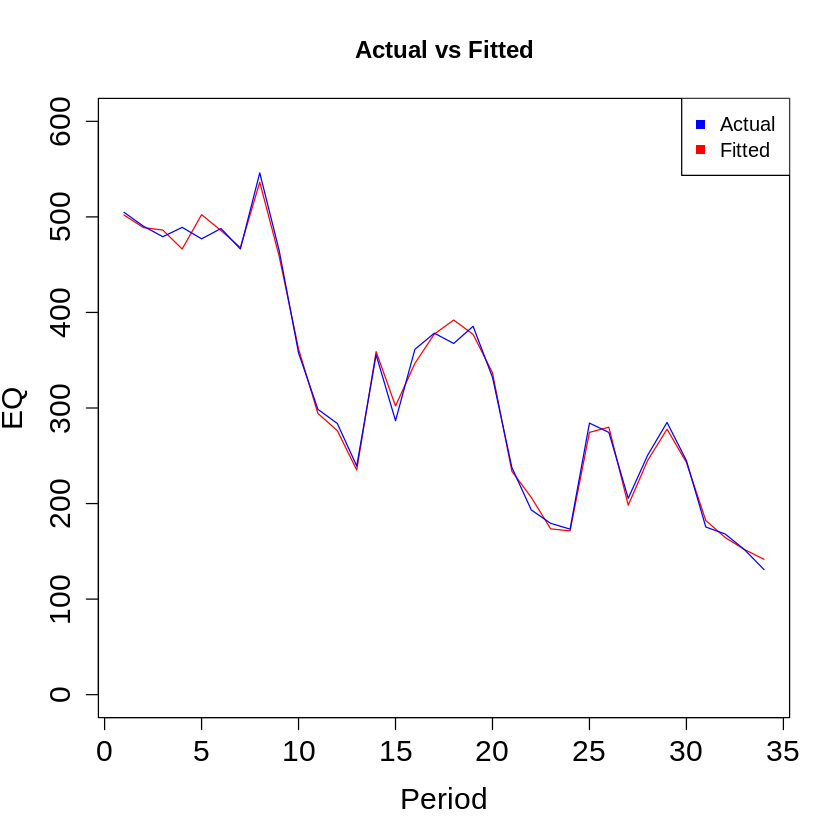

In [0]:
plot(exp(fitted(model,estimator = "BPM")), type="l", col="red" ,ylim=range(0,600),ylab="EQ",cex.lab=1.5,cex.axis=1.5,main="Actual vs Fitted",xlab="Period")
lines((exp(data$EQ)), type="l",col="blue")
legend("topright",legend=c("Actual","Fitted"),pch=c(15,15),col=c('blue','red'))

In [0]:
mape_model_bas_bpm = sum(abs((exp(data$EQ) - exp(fitted(model,estimator = "BPM"))) / exp(data$EQ))) / 34
print(paste("The train mape is :",toString(mape_model_bas_bpm)))

[1] "The train mape is : 0.025149281926824"


##Bayesian Regression Model 4


1.   The training and test data is the hurdle 2 data with 
     missing values
2.   The missing values were filled using KNN

1.   The training and test data were merged before using
     KNN to fill the missing data as the assumpotion was
     that both train and test data came from the same
     distribution .
1.   Since we wanted to predict the model as a time series
     model,after merging the train and test data,we sorted 
     by the Period column and set aside the last 6 values 
     as test set
     
5.   The data was tranformed using log tranformation to 
     scale  down the large variables




In [0]:
data<-read_excel("new_train.xlsx")
full_data<-data[,-1]
data<-full_data[1:33,]
data<-log(data)

New names:
* `` -> ...1



In [0]:
model<- bas.lm(EQ ~ .,
                     data = data,
                     method = "MCMC",
                     prior = "ZS-null",
                     modelprior = uniform())



Warning message in bas.lm(EQ ~ ., data = data, method = "MCMC", prior = "ZS-null", :
“Uniform prior (Bernoulli)  distribution on the Model Space are not recommended for p > n; please consider using tr.beta.binomial or power.prior instead”


In [0]:
model


Call:
bas.lm(formula = EQ ~ ., data = data, prior = "ZS-null", modelprior = uniform(), 
    method = "MCMC")


 Marginal Posterior Inclusion Probabilities: 
                         Intercept           Social_Search_Impressions  
                           1.00000                             0.08509  
        Social_Search_Working_cost                 Digital_Impressions  
                           0.07458                             0.07712  
              Digital_Working_cost             Print_Impressions.Ads40  
                           0.07517                             0.59458  
          Print_Working_Cost.Ads50                     OOH_Impressions  
                           0.73839                             0.10395  
                  OOH_Working_Cost                             SOS_pct  
                           0.09838                             0.70883  
           Digital_Impressions_pct                               CCFOT  
                           0.13086     

In [0]:
summary(model)







,P(B != 0 | Y),model 1,model 2,model 3,model 4,model 5
Intercept,1.00000000,1.00000,1.0000000,1.0000000,1.0000000,1.0000000
Social_Search_Impressions,0.08509418,0.00000,0.0000000,0.0000000,0.0000000,0.0000000
Social_Search_Working_cost,0.07458422,0.00000,0.0000000,0.0000000,0.0000000,0.0000000
Digital_Impressions,0.07712217,0.00000,0.0000000,0.0000000,0.0000000,0.0000000
Digital_Working_cost,0.07516645,0.00000,0.0000000,0.0000000,0.0000000,0.0000000
Print_Impressions.Ads40,0.59457828,0.00000,0.0000000,1.0000000,1.0000000,1.0000000
Print_Working_Cost.Ads50,0.73838524,1.00000,1.0000000,1.0000000,0.0000000,1.0000000
OOH_Impressions,0.10395274,0.00000,0.0000000,0.0000000,0.0000000,0.0000000
OOH_Working_Cost,0.09837537,0.00000,0.0000000,0.0000000,0.0000000,0.0000000
SOS_pct,0.70883303,1.00000,1.0000000,1.0000000,1.0000000,1.0000000


In [0]:
test=full_data[34:39,]
test<-log(test)

In [0]:
pred<-predict(model,estimator="BPM",test)

#prediction is using the best possible model


In [0]:

mape_model_bas_bpm = sum(abs((exp(test$EQ) - exp(pred$fit)) / exp(test$EQ))) /6
print(paste("The test mape is :",toString(mape_model_bas_bpm)))


[1] "The test mape is : 0.13905040841254"


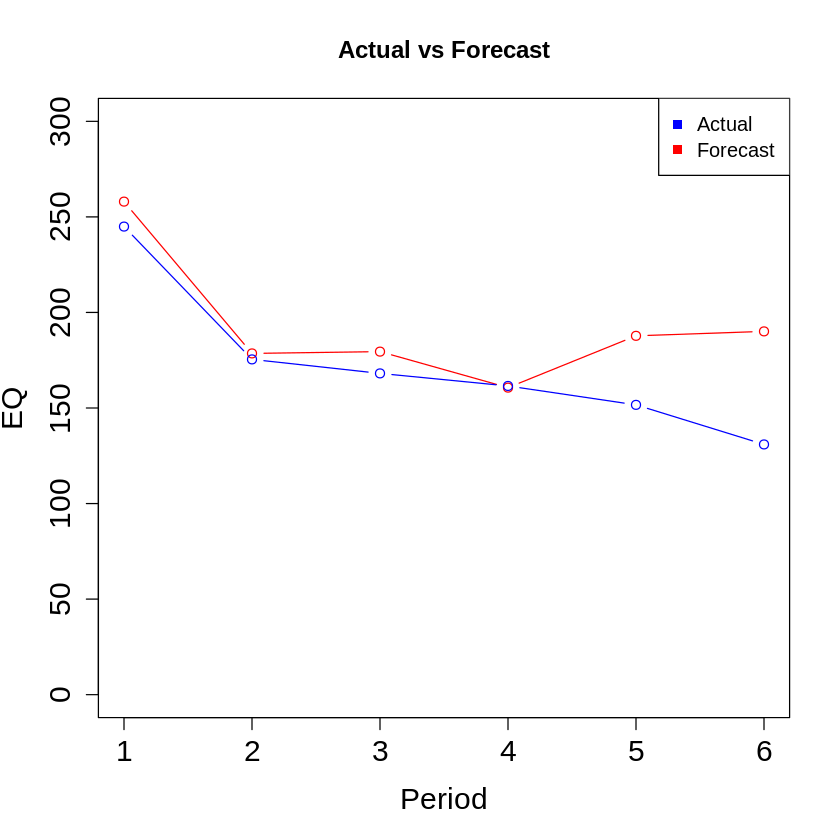

In [0]:
plot(exp(pred$fit), type="b", col="red" ,ylim=range(0,300),ylab="EQ",cex.lab=1.5,cex.axis=1.5,main="Actual vs Forecast",xlab="Period")
lines((exp(test$EQ)), type="b",col="blue")
legend("topright",legend=c("Actual","Forecast"),pch=c(15,15),col=c('blue','red'))

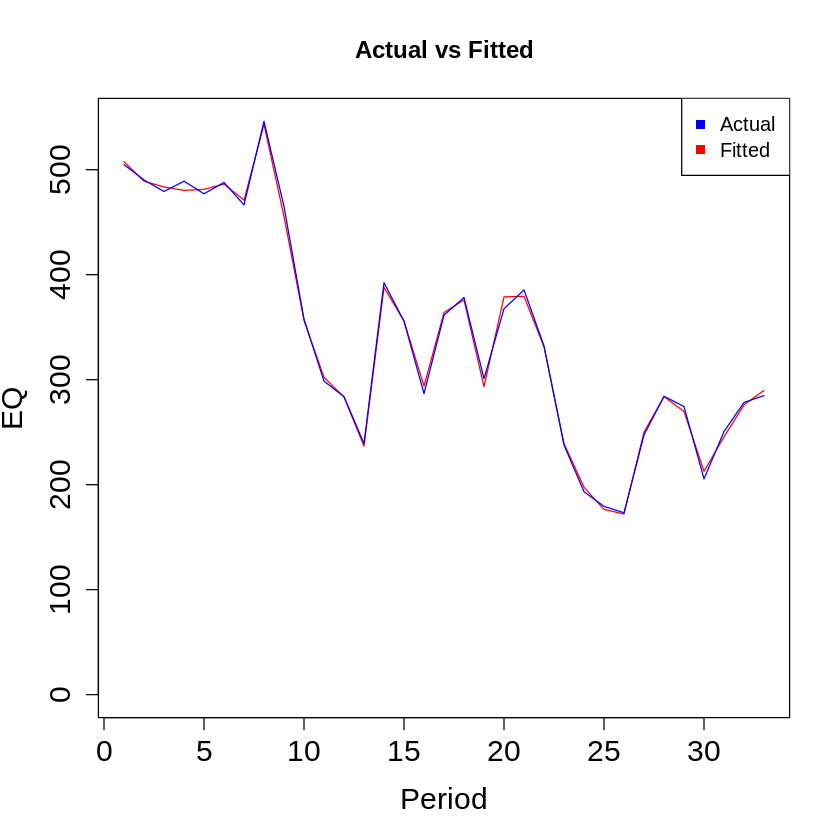

In [0]:
plot(exp(fitted(model,estimator = "BPM")), type="l", col="red" ,ylim=range(0,exp(data$EQ)),ylab="EQ",cex.lab=1.5,cex.axis=1.5,main="Actual vs Fitted",xlab="Period")
lines((exp(data$EQ)), type="l",col="blue")
legend("topright",legend=c("Actual","Fitted"),pch=c(15,15),col=c('blue','red'))

In [0]:
mape_model_bas_bpm = sum(abs((exp(data$EQ) - exp(fitted(model,estimator = "BPM"))) / exp(data$EQ))) / 33
print(paste("The train mape is :",toString(mape_model_bas_bpm)))

[1] "The train mape is : 0.0119847112554071"
